LIST OF CONTENT - Coding Etiquette & Excel Reporting

1. preparations
2. adress privacy problems
3. analyze according to regions
4. excluding customers with low activity
5. creating profils
6. creating visualizations
7. aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure¶
8. compare customer profiles with regions and departments - create visualiza
9. saving final sample

# 1. preparations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/ru/Desktop/CF/04 Achievement 4_Python'


In [3]:
# importing small sample of ords_prods_cust_merge due to better handling and avoiding of RAM Problems
small_ords_prods_cust_merge = pd.read_pickle(os.path.join(path,
'02_Data','2.2 Prepared Data', 'small_ords_prods_cust_merge.pkl'))

In [4]:
small_ords_prods_cust_merge.head(5)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,28.0,6.0,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764.0,1.0,3.0,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
3,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1871483.0,825.0,3.0,2.0,...,Regular customer,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171
6,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,2694698.0,1480.0,39.0,2.0,...,Frequent customer,Randy,Franklin,Male,Alabama,19,12/28/2019,1,living with parents and siblings,32283
10,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,2799665.0,1540.0,14.0,1.0,...,Frequent customer,Willie,Goodman,Male,Florida,76,11/24/2017,3,married,53340


In [5]:
# simplifying name of dataset
df=small_ords_prods_cust_merge


In [6]:
df.shape

(2917156, 34)

# 2. adress privacy problems

ATTENTION: PII! 
the columns 'first_Name' and 'surname' contain personal identifiable information - specialy in combination of these two coulumns. In combination with ' n_dependants, 'fam_status' and especially 'income' these is highly private information.
To continue I will create a copy of the dataframe (df_priv) and drop the coulumnsd with sensitive data.

In [7]:
df_priv = df.copy()

In [8]:
# drop colums with sensitive data in a copy
df_priv=df_priv.drop(columns= ['first_name', 'surname'])

In [9]:
df_priv.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'last_order (in days)', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest day', 'busiest days',
       'Most Orders', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_frequency', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

# 3. analyze according to regions

In [10]:
# creating variable 'Region' - assigning regions according to 'state'
result = []

for value in df_priv['state']:
    if value in ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]:
        result.append("Region 1 North East")
    elif value in ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]:
        result.append("Region 2 Mid West")
    elif value in ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]:
        result.append("Region 3 South")
    else:
        result.append("Region 4 West")

In [11]:
df_priv['Region']= result

In [12]:
df_priv['Region'].value_counts(dropna=False)

Region
Region 3 South         972801
Region 4 West          745817
Region 2 Mid West      683079
Region 1 North East    515459
Name: count, dtype: int64

In [13]:
df_priv.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'last_order (in days)', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest day', 'busiest days',
       'Most Orders', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_frequency', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'Region'],
      dtype='object')

In [14]:
# identify spending habbits according to regions via crossing
crosstab = pd.crosstab(df_priv['Region'], df_priv['spending_flag'], dropna = False)

In [15]:
crosstab

spending_flag,High spender,Low spender
Region,,
Region 1 North East,9823,505636
Region 2 Mid West,13961,669118
Region 3 South,19077,953724
Region 4 West,14441,731376


In [16]:
# sort crosstab accotding to size
crosstab_sorted = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]

In [17]:
df_priv.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'last_order (in days)', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest day', 'busiest days',
       'Most Orders', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_frequency', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'Region'],
      dtype='object')

# 4. excluding customers with low activity

In [18]:
# creating a exclusion flag for customers with little orders (< 5)
df_priv['exclusion_flag'] = df_priv['max_order'] < 5

In [19]:
# checking results
df_priv['exclusion_flag'].value_counts()

exclusion_flag
False    2787550
True      129606
Name: count, dtype: int64

In [20]:
df_priv[df_priv['exclusion_flag'] == True]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag
2,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,652770.0,764.0,1.0,3.0,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,Region 2 Mid West,True
218,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1858512.0,83973.0,2.0,1.0,...,Regular customer,Male,New York,69,6/5/2019,0,divorced/widowed,35417,Region 1 North East,True
292,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,2801061.0,107675.0,2.0,1.0,...,Non-frequent customer,Female,Illinois,62,1/20/2020,2,married,112656,Region 2 Mid West,True
334,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,551750.0,117528.0,2.0,3.0,...,Frequent customer,Female,New Hampshire,55,7/16/2018,3,married,98325,Region 1 North East,True
347,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1753118.0,123924.0,3.0,2.0,...,Non-frequent customer,Male,Utah,18,12/22/2018,0,single,31619,Region 4 West,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729586,49687.0,49683,Cucumber Kirby,83.0,4.0,13.2,1987109.0,203981.0,2.0,5.0,...,Frequent customer,Female,Oregon,39,10/23/2017,0,single,76128,Region 4 West,True
9729597,49687.0,49683,Cucumber Kirby,83.0,4.0,13.2,1531046.0,204049.0,2.0,3.0,...,Non-frequent customer,Female,West Virginia,30,8/23/2018,2,married,74859,Region 3 South,True
9729714,49687.0,49683,Cucumber Kirby,83.0,4.0,13.2,2838318.0,204972.0,1.0,4.0,...,Non-frequent customer,Female,Arizona,34,6/1/2017,2,married,80257,Region 4 West,True
9729872,49687.0,49683,Cucumber Kirby,83.0,4.0,13.2,374267.0,206122.0,2.0,5.0,...,Regular customer,Male,Oklahoma,27,1/29/2020,3,married,56082,Region 3 South,True


In [21]:
# defining activ customers: opposite of exclusion flag
df_priv_act=df_priv[df_priv['exclusion_flag'] == False]

In [22]:
# checking result. Same result as above
df_priv_act.shape

(2787550, 34)

# 5. creating profils

In [23]:
# creating profile based on age
df_priv_act['age'].value_counts(dropna=False).sort_index()

age
18    42862
19    44974
20    43272
21    43688
22    44167
      ...  
77    42924
78    42265
79    45644
80    44685
81    43874
Name: count, Length: 64, dtype: int64

In [24]:
def profile_age_group(age):
    if age <= 29:
        return 'young adult'
    elif 30 <= age <= 49:
        return 'adult'
    elif 50 <= age <= 64:
        return 'middle age'
    else:
        return 'senior'

In [25]:
# apply 
df_priv_act['age_group'] = df_priv_act['age'].apply(profile_age_group)

/var/folders/ds/6109zp994ddgpkwq7qfc1y3c0000gp/T/ipykernel_42083/3166491928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priv_act['age_group'] = df_priv_act['age'].apply(profile_age_group)


In [26]:
# check results
df_priv_act['age_group'].value_counts()

age_group
adult          876859
senior         739045
middle age     649463
young adult    522183
Name: count, dtype: int64

In [27]:
# creating profile based on income
df_priv_act['income'].value_counts(dropna=False).sort_index()

income
25903      3
25911      3
25937      4
25941      3
25955     31
          ..
584097    74
590790     8
591089    18
592409    27
593901    64
Name: count, Length: 95044, dtype: int64

In [28]:
df_priv_act['income'].agg(['mean', 'min', 'max'])

mean     99686.332859
min      25903.000000
max     593901.000000
Name: income, dtype: float64

In [29]:
def profile_income(income):
    if income < 50000:
        return 'low income'
    elif 50000 <= income <= 200000:
        return 'middle income'
    else:
        return 'high income'

In [30]:
# apply 
df_priv_act['income_group'] = df_priv_act['income'].apply(profile_income)

/var/folders/ds/6109zp994ddgpkwq7qfc1y3c0000gp/T/ipykernel_42083/2101031914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priv_act['income_group'] = df_priv_act['income'].apply(profile_income)


In [31]:
# check results
df_priv_act['income_group'].value_counts()

income_group
middle income    2460978
low income        303407
high income        23165
Name: count, dtype: int64

In [32]:
# creating profile based on parental status
df_priv_act['n_dependants'].value_counts(dropna=False)

n_dependants
0    698950
3    698043
2    697882
1    692675
Name: count, dtype: int64

In [33]:
def profile_parental_status(n_dependants):
    if n_dependants == 0:
        return 'single adult'
    elif n_dependants == 1:
        return 'small family'
    else:
        return 'big family'

In [34]:
# apply 
df_priv_act['parental_status'] = df_priv_act['n_dependants'].apply(profile_parental_status)

/var/folders/ds/6109zp994ddgpkwq7qfc1y3c0000gp/T/ipykernel_42083/2003578667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priv_act['parental_status'] = df_priv_act['n_dependants'].apply(profile_parental_status)


In [35]:
for value in df_priv_act['n_dependants']:
    if value == 0:
        result.append('single adult')
    elif value < 3:
        result.append('small family')
    else:
        result.append('big family')

In [36]:
# check results
df_priv_act['parental_status'].value_counts(dropna=False)

parental_status
big family      1395925
single adult     698950
small family     692675
Name: count, dtype: int64

In [37]:
df_priv_act.head(5)

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,...,age,date_joined,n_dependants,fam_status,income,Region,exclusion_flag,age_group,income_group,parental_status
0,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138.0,28.0,6.0,...,81,8/1/2019,1,married,49620,Region 2 Mid West,False,senior,low income,small family
3,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1871483.0,825.0,3.0,2.0,...,20,5/8/2019,3,living with parents and siblings,34171,Region 3 South,False,young adult,low income,big family
6,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,2694698.0,1480.0,39.0,2.0,...,19,12/28/2019,1,living with parents and siblings,32283,Region 3 South,False,young adult,low income,small family
10,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,2799665.0,1540.0,14.0,1.0,...,76,11/24/2017,3,married,53340,Region 3 South,False,senior,middle income,big family
12,0.0,1,Chocolate Sandwich Cookies,61.0,19.0,5.8,1955535.0,1540.0,25.0,6.0,...,76,11/24/2017,3,married,53340,Region 3 South,False,senior,middle income,big family


In [38]:
df_priv_act.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'last_order (in days)', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest day', 'busiest days',
       'Most Orders', 'max_order', 'loyalty_flag', 'mean_prices',
       'spending_flag', 'median_frequency', 'order_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'Region', 'exclusion_flag', 'age_group', 'income_group',
       'parental_status'],
      dtype='object')

In [39]:
# identify customer habits according to age group and parental status via crossing


In [40]:
# age and order_frequency
ct_age_freq = pd.crosstab(
     df_priv_act['age_group'],
    df_priv_act['order_frequency_flag']
   
)

In [41]:
# parentel_status and order_frequency
ct_parent_freq = pd.crosstab(
     df_priv_act['parental_status'],
    df_priv_act['order_frequency_flag']
   
)

# 6. creating visualizations

In [42]:
# creating a sample from the sample in relation 70/30
np.random.seed(4)
dev = np.random.rand(len(df_priv_act)) <= 0.7

In [43]:
# assignig the big sample
big = df_priv_act[dev]

In [44]:
# assigning the small sample
small_df=df_priv_act[~dev]

In [45]:
small_df.shape

(836218, 37)

<Axes: xlabel='age', ylabel='income'>

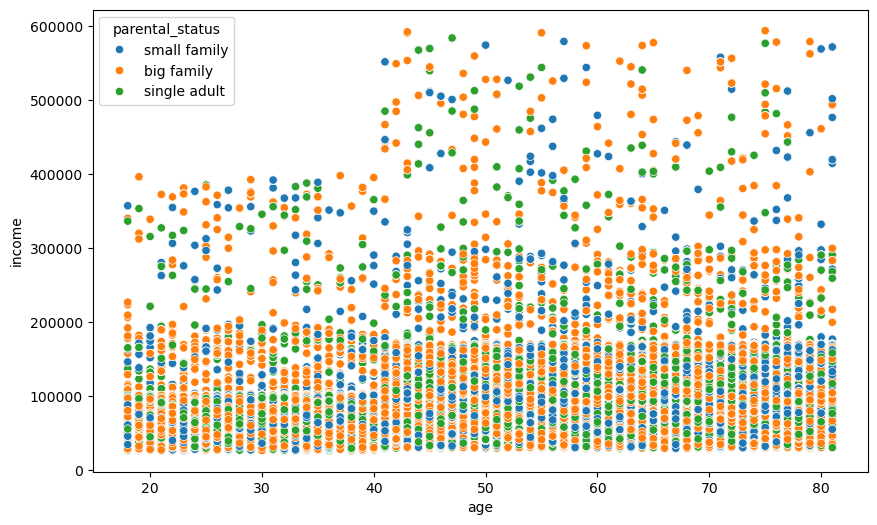

In [46]:
# Scatterplot including age, income, and parenting status
sct_parent_age_income = plt.figure(figsize=(10, 6))
sns.scatterplot(data=small_df,
                x='age',
                y='income', 
                hue='parental_status')
     
             

In [47]:
# saving image
sct_parent_age_income.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'sct_parent_age_income.png'))

Text(0.5, 1.0, 'Parental Status of Customers')

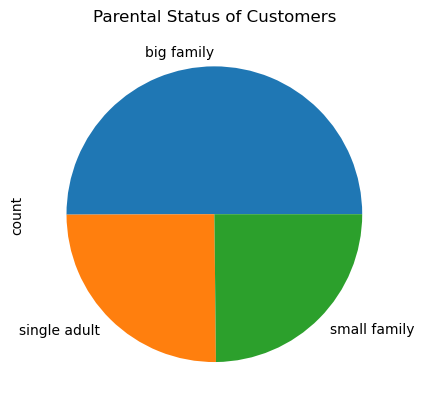

In [48]:
# creating a pie chart for clearer devision of family status
pie_parental_status=small_df['parental_status'].value_counts().plot.pie()
plt.title('Parental Status of Customers')

In [49]:
# saving image
pie_parental_status.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'pie_parental_status'))

Text(0.5, 1.0, 'Distribution of Age Groups among Customers')

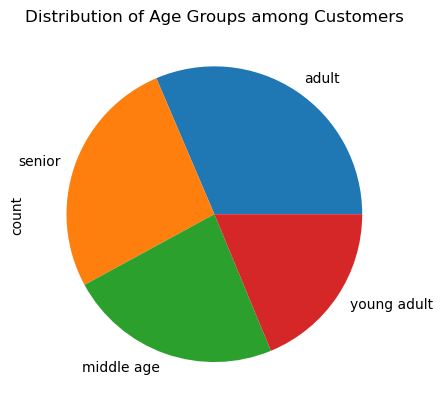

In [50]:
# creating pi chart for age groups
pie_age_group=small_df['age_group'].value_counts().plot.pie()
plt.title('Distribution of Age Groups among Customers')

In [51]:
# saving image
pie_age_group.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'pie_age_groups'))

Text(0.5, 1.0, 'Distribution of Income among Customers')

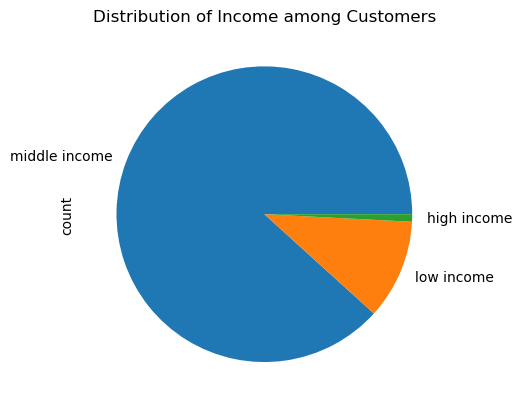

In [52]:
# creating a pie chart for income_groups
pie_income_group=small_df['income_group'].value_counts().plot.pie()
plt.title('Distribution of Income among Customers')

In [53]:
# saving image
pie_income_group.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'pie_income_groups'))

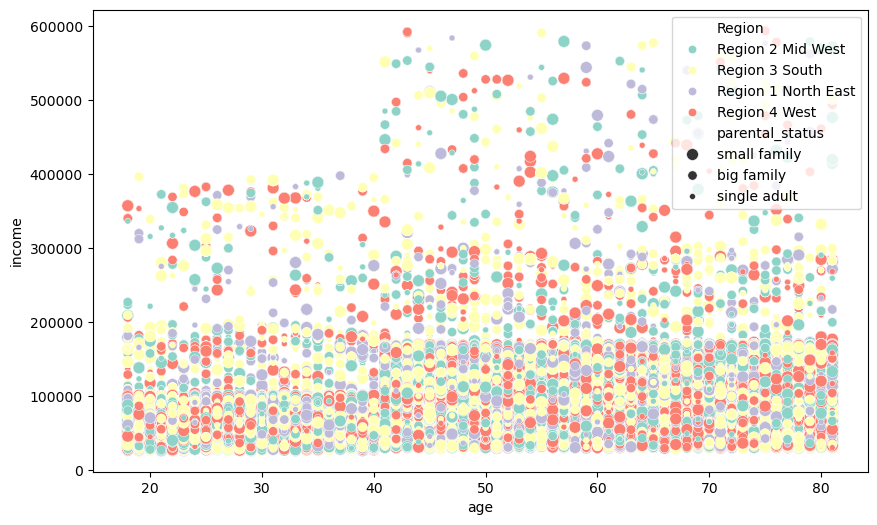

In [54]:
# Scatterplot including region, income, parental status, age
sct_parent_age_income_region = plt.figure(figsize=(10, 6))
sns.scatterplot(data=small_df,
                x='age',
                y='income', 
                hue='Region',
                size = 'parental_status',
                palette = 'Set3')
plt.legend(loc='upper right')


In [55]:
# saving image
sct_parent_age_income_region.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'sct_parent_age_income_region.png'))

/var/folders/ds/6109zp994ddgpkwq7qfc1y3c0000gp/T/ipykernel_42083/48457272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_counts, x='Region', y='Count', palette= ['#8dd3c7', '#ffffb3', '#fb8072','#bebada' ])


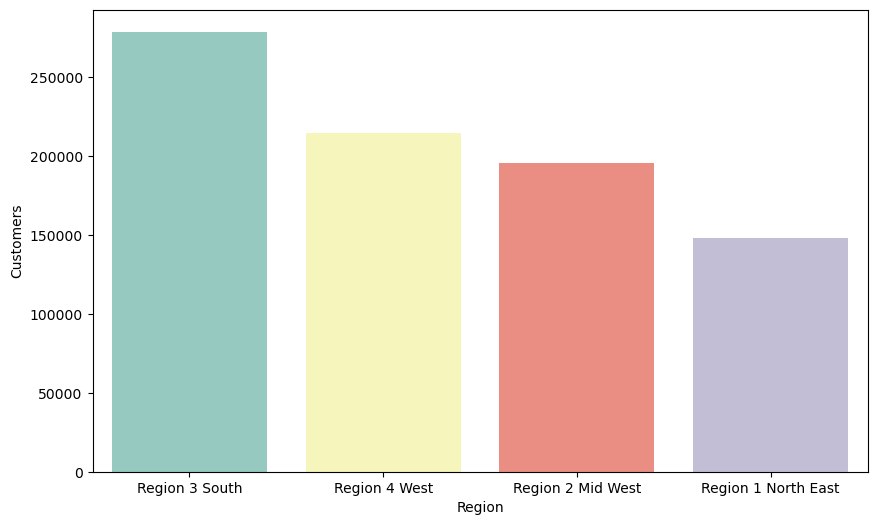

In [56]:
# Bar Chart about distribution of customers - same color schema as scatterplot
region_counts = small_df['Region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(data=region_counts, x='Region', y='Count', palette= ['#8dd3c7', '#ffffb3', '#fb8072','#bebada' ])
plt.xlabel('Region')
plt.ylabel('Customers')
plt.savefig('region_counts.png')
plt.show()


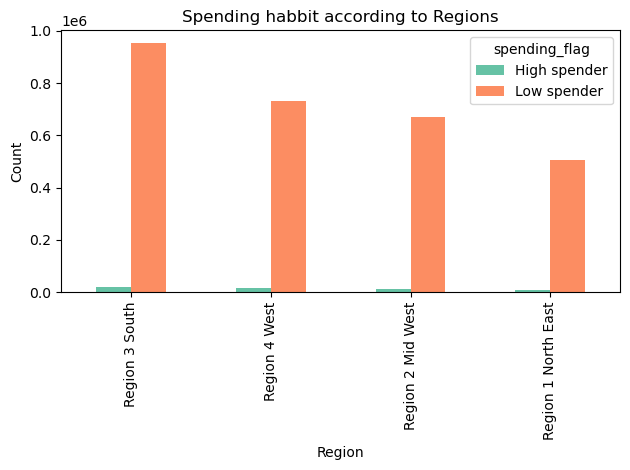

In [57]:
# creating barchart with spending habits according to region
bar_region_spending_habits=crosstab_sorted.plot(kind='bar', stacked=False,color=sns.color_palette("Set2") )
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Spending habbit according to Regions')
plt.tight_layout()
plt.show()

In [58]:
# saving image
bar_region_spending_habits.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_region_spending_habits.png'))

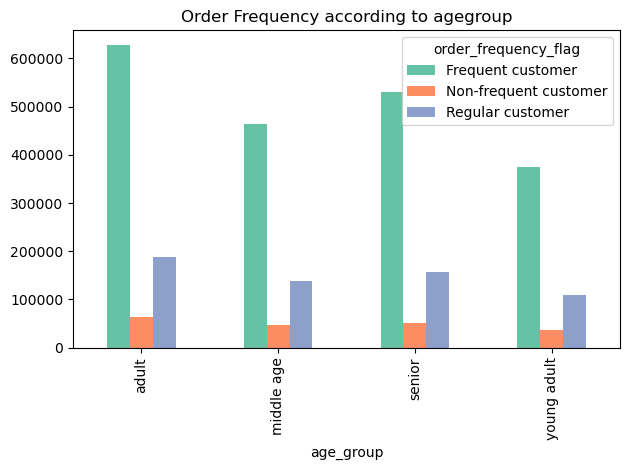

In [59]:
# creating bar chart order frequency-age
bar_age_order_frequency=ct_age_freq.plot(kind='bar', stacked=False,color=sns.color_palette("Set2") )

plt.title('Order Frequency according to agegroup')
plt.tight_layout()
plt.show()

In [60]:
# saving image
bar_age_order_frequency.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_age_order_frequency.png'))
          


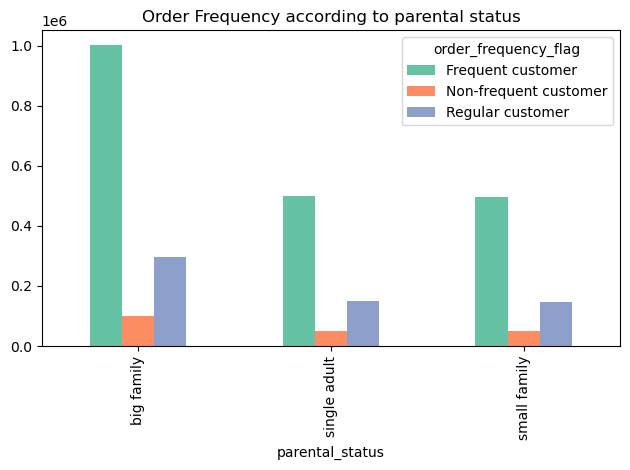

In [61]:
# creating bar chart order frequency-parental status
bar_parental_status_order_frequency=ct_parent_freq.plot(kind='bar', stacked=False,color=sns.color_palette("Set2") )

plt.title('Order Frequency according to parental status')
plt.tight_layout()
plt.show()

In [62]:
# saving image
bar_parental_status_order_frequency.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_parent_order_frequency.png'))
          


# 7. aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [63]:
# Group by customer profile: age_group - with original sample
agg_df_age_group = df_priv_act.groupby('age_group').agg({
    'median_frequency': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [64]:
agg_df_age_group

age_group median_frequency                  prices                
                            max      mean  min      max       mean  min
0        adult             30.0  9.347798  0.0  99999.0  11.327897  1.0
1   middle age             30.0  9.369662  0.0  99999.0  12.520564  1.0
2       senior             30.0  9.310217  0.0  99999.0  11.424653  1.0
3  young adult             30.0  9.322266  0.0  99999.0  11.739215  1.0

In [65]:
# Group by customer profile: income_group - with original sample
agg_df_income_group = df_priv_act.groupby('income_group').agg({
    'median_frequency': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [66]:
agg_df_income_group

income_group median_frequency                  prices                 
                              max      mean  min      max        mean  min
0    high income             30.0  8.516080  0.0  99999.0  246.987584  1.0
1     low income             30.0  9.869687  0.0     25.0    6.705729  1.0
2  middle income             30.0  9.280352  0.0  99999.0   10.110152  1.0

In [67]:
# Group by customer profile: parental_status - with original sample
agg_df_parental_status = df_priv_act.groupby('parental_status').agg({
    'median_frequency': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [68]:
agg_df_parental_status

parental_status median_frequency                  prices                
                               max      mean  min      max       mean  min
0      big family             30.0  9.346266  0.0  99999.0  11.531363  1.0
1    single adult             30.0  9.319284  0.0  99999.0  11.363605  1.0
2    small family             30.0  9.340814  0.0  99999.0  12.413294  1.0

# 8. compare customer profiles with regions and departments - create visualizations

In [69]:
# creating a department dictionary
department_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

In [70]:
df_priv_act['department_name'] = df_priv_act['department_id'].replace(department_dict)

/var/folders/ds/6109zp994ddgpkwq7qfc1y3c0000gp/T/ipykernel_42083/134569482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_priv_act['department_name'] = df_priv_act['department_id'].replace(department_dict)


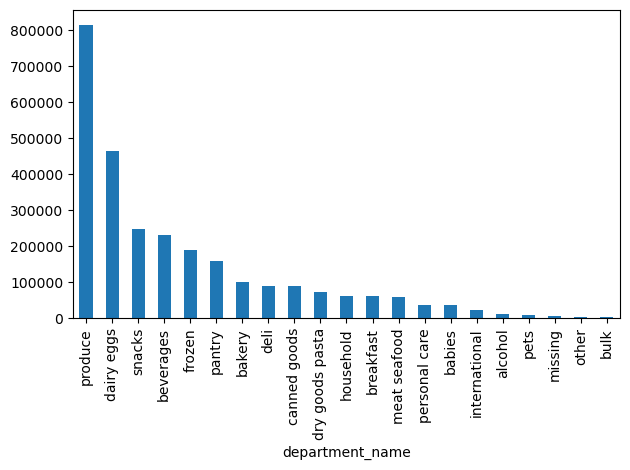

In [71]:
bar_department_name=df_priv_act['department_name'].value_counts().plot.bar()
plt.tight_layout()

In [72]:
# saving image
bar_department_name.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_department_name.png'))

In [73]:
# grouping department name, age group, region
dep_age_reg = df_priv_act.groupby(
    ['department_name','age_group', 'Region' ]).size().reset_index(name='order_count').sort_values('order_count', ascending=False)

In [74]:
dep_age_reg

,department_name,age_group,Region,order_count
306,produce,adult,Region 3 South,86420
314,produce,senior,Region 3 South,71365
307,produce,adult,Region 4 West,65700
310,produce,middle age,Region 3 South,63078
305,produce,adult,Region 2 Mid West,60283
...,...,...,...,...
88,bulk,senior,Region 1 North East,124
95,bulk,young adult,Region 4 West,123
92,bulk,young adult,Region 1 North East,110
84,bulk,middle age,Region 1 North East,108


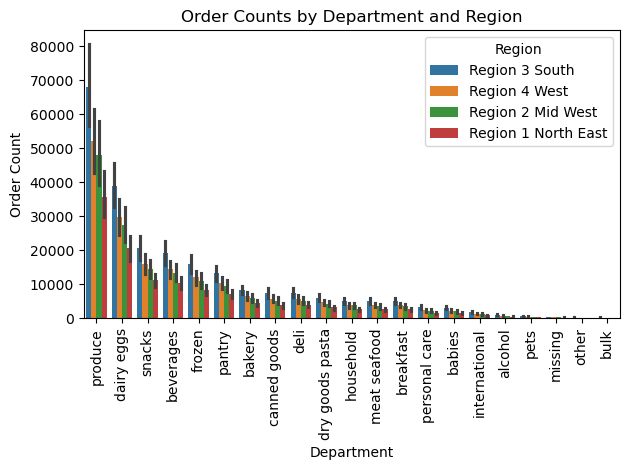

In [75]:
# creating barplot
ord_counts_by_dep_and_region = plt.figure()
sns.barplot(
    data=dep_age_reg,
    x='department_name',
    y='order_count',
    hue='Region'
)
plt.title('Order Counts by Department and Region')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [76]:
# saving image
ord_counts_by_dep_and_region.figure.savefig(os.path.join(path, '04_Analysis','4.3. visualizations', 'bar_ord_counts_by_dep_and_region.png'))

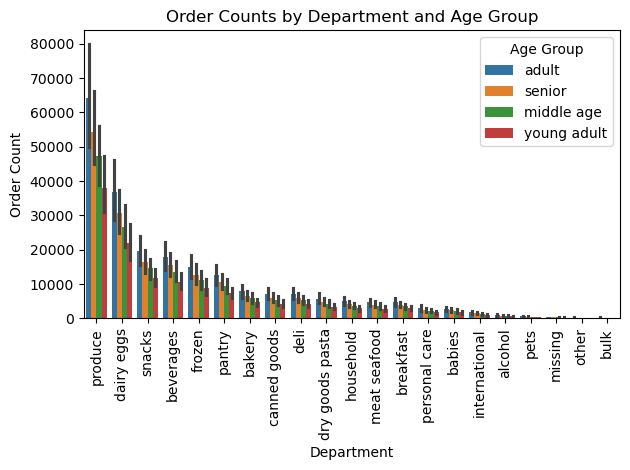

In [77]:
# creating barplot
ord_counts_by_dep_and_age_group = plt.figure()
sns.barplot(
    data=dep_age_reg,
    x='department_name',
    y='order_count',
    hue='age_group'
)
plt.title('Order Counts by Department and Age Group')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='Age Group')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [78]:
# saving image
ord_counts_by_dep_and_age_group.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_ord_counts_by_dep_and_age_group.png'))

In [79]:
# grouping department name, age group, region, parental status
dep_age_reg_parent = df_priv_act.groupby(
    ['department_name','age_group', 'Region', 'parental_status' ]).size().reset_index(name='order_count').sort_values('order_count', ascending=False)

In [80]:
dep_age_reg_parent

,department_name,age_group,Region,parental_status,order_count
918,produce,adult,Region 3 South,big family,43718
942,produce,senior,Region 3 South,big family,36252
921,produce,adult,Region 4 West,big family,33314
930,produce,middle age,Region 3 South,big family,31720
915,produce,adult,Region 2 Mid West,big family,29910
...,...,...,...,...,...
757,other,young adult,Region 1 North East,single adult,28
254,bulk,middle age,Region 1 North East,small family,27
265,bulk,senior,Region 1 North East,single adult,25
278,bulk,young adult,Region 1 North East,small family,25


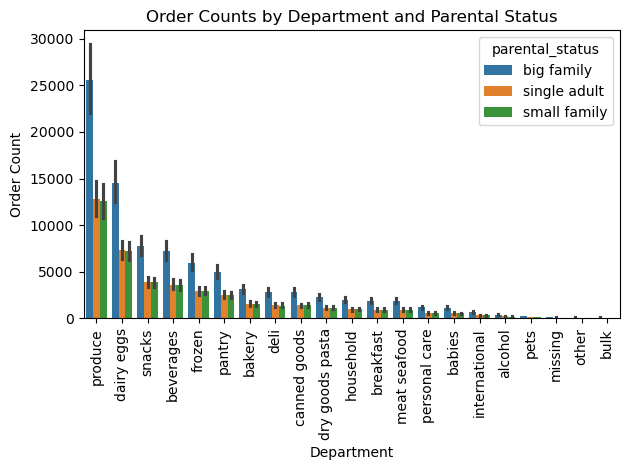

In [81]:
# creating barplot
ord_counts_by_dep_and_parent = plt.figure()
sns.barplot(
    data=dep_age_reg_parent,
    x='department_name',
    y='order_count',
    hue='parental_status'
)
plt.title('Order Counts by Department and Parental Status')
plt.xlabel('Department')
plt.ylabel('Order Count')
plt.legend(title='parental_status')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [82]:
# saving image
ord_counts_by_dep_and_parent.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_ord_counts_by_dep_and_parent.png'))

In [83]:
# grouping profiles, department, income
profiles_department_region = df_priv_act.groupby(
    ['department_name','age_group', 'Region', 'parental_status', 'income_group' ]).size().reset_index(name='order_count').sort_values('order_count', ascending=False)

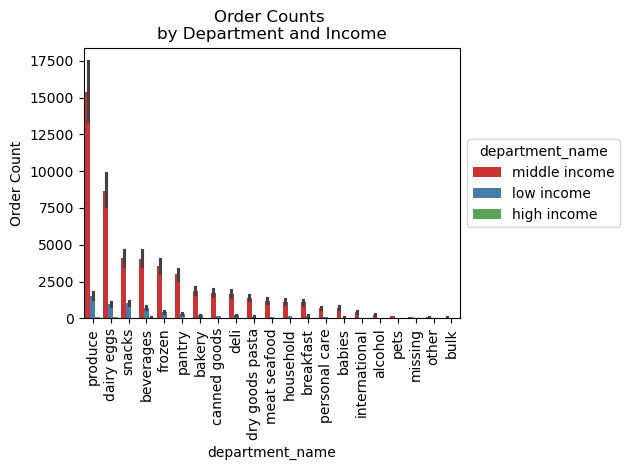

In [84]:
# barplot departments_income
departments_income = plt.figure()
sns.barplot(
    data=profiles_department_region,
    x='department_name',
    y='order_count',
    hue='income_group',
    palette='Set1'  
)
plt.title('Order Counts \nby Department and Income')
plt.ylabel('Order Count')

plt.legend(title='department_name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

In [85]:
# saving image
departments_income.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_departments_income.png'))

In [86]:
# focus on top 5 departments
top_departments = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']

In [87]:
# filter dataframe
filtered_df = profiles_department_region[profiles_department_region['department_name'].isin(top_departments)]

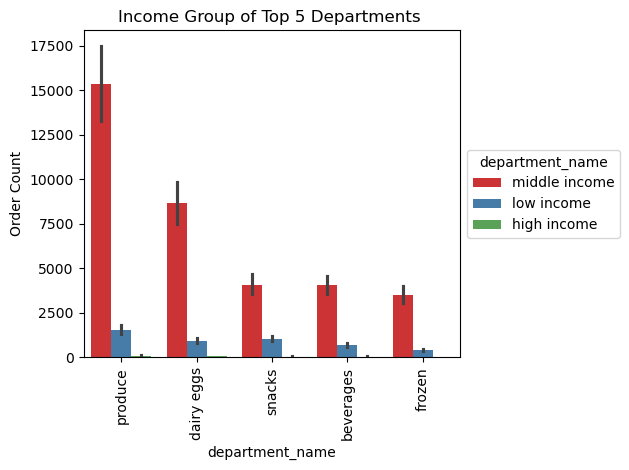

In [88]:
# barplot departments_income top 5 departments
top_departments_income = plt.figure()
sns.barplot(
    data=filtered_df,
    x='department_name',
    y='order_count',
    hue='income_group',
    palette='Set1'  
)
plt.title('Income Group of Top 5 Departments ')
plt.ylabel('Order Count')

plt.legend(title='department_name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

In [89]:
# saving image
top_departments_income.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_top_departments_income.png'))

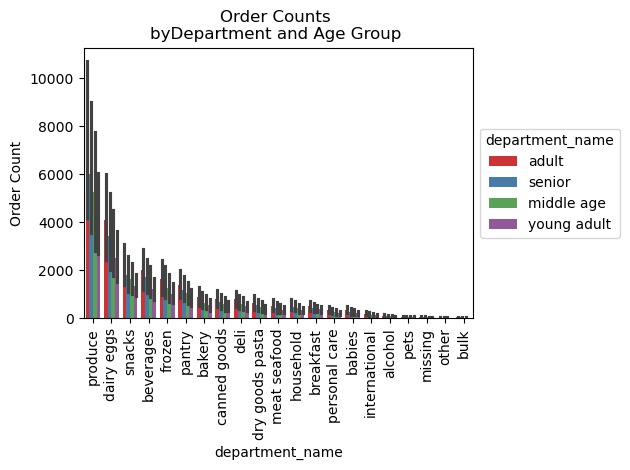

In [90]:
#barplot departments age_group
departments_age_group = plt.figure()
sns.barplot(
    data=profiles_department_region,
    x='department_name',
    y='order_count',
    hue='age_group',
    palette='Set1'  
)
plt.title('Order Counts \nbyDepartment and Age Group ')
plt.ylabel('Order Count')

plt.legend(title='department_name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [91]:
# saving image
departments_age_group.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_departments_age_group.png'))

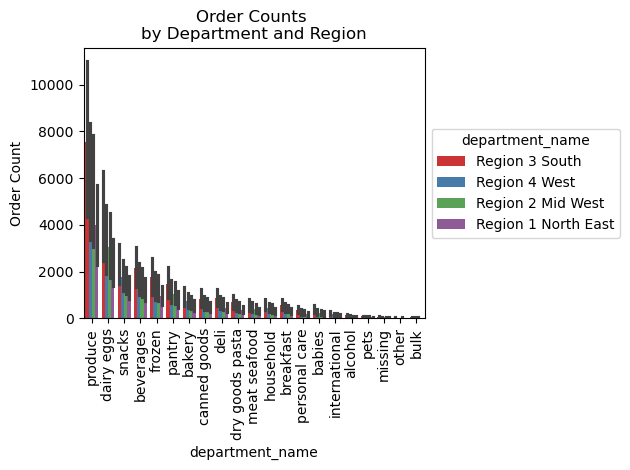

In [92]:
# barplot department_region
departments_region = plt.figure()
sns.barplot(
    data=profiles_department_region,
    x='department_name',
    y='order_count',
    hue='Region',
    palette='Set1'  
)
plt.title('Order Counts \nby Department and Region')
plt.ylabel('Order Count')


plt.legend(title='department_name', loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [93]:
# saving image
departments_region.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_departments_region.png'))

In [94]:
# grouping spending habbits
profile_spending_habbits = df_priv_act.groupby(
    ['loyalty_flag','spending_flag']).size().reset_index(name='order_count').sort_values('order_count', ascending=False)

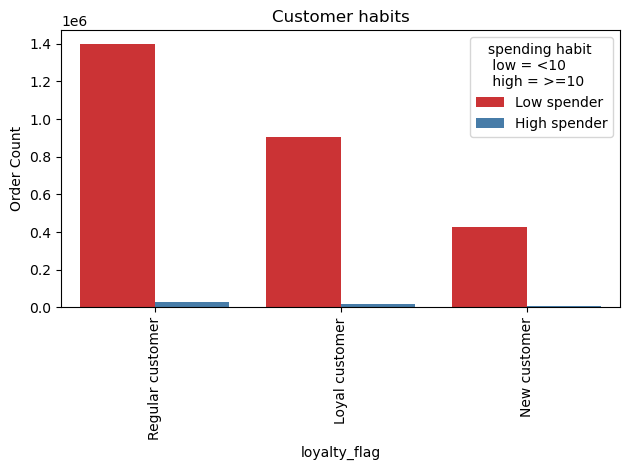

In [95]:
# barplot spending habbits
customer_habits = plt.figure()
sns.barplot(
    data=profile_spending_habbits,
    x='loyalty_flag',
    y='order_count',
    hue='spending_flag',
    palette='Set1'  
)
plt.title('Customer habits')
plt.ylabel('Order Count')
plt.legend(title='spending habit \n low = <10 \n high = >=10')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()

In [96]:
# saving image
customer_habits.figure.savefig(os.path.join(path, 
                                                         '04_Analysis','4.3. visualizations', 
                                                         'bar_customer_habits.png'))

# 9. saving final sample

In [97]:
df_priv_act.to_pickle(os.path.join(path, '02_Data','2.2 Prepared Data', 'final_sample_4.10.pkl'))